In [1]:
import pandas as pd
import numpy
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
import statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import scipy
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using Theano backend.


In [34]:
#filedata= 'C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv'
#filedata= 'C:/Users/C00310965/Desktop/caloba/DFSQS68lagosul_cell_2017.csv'
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
#dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],index_col='date',date_parser=dateparse)
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],date_parser=dateparse)
#dataframe = pd.read_csv(filedata, engine='python', sep=';')

In [ ]:
###testes

In [168]:
filedata= 'C:/Users/C00310965/Desktop/caloba/DFSQS68lagosul_cell_2017.csv'
#filedata= 'C:/Users/C00310965/Documents/livros/source/load_bafsa.csv'
#filedata= 'C:/Users/C00310965/Documents/livros/source/hs_users.csv'
#filedata= 'C:/Users/C00310965/Documents/livros/source/hs_users_prsc.csv'
##2,4
dataframe = pd.read_csv(filedata, usecols=[6], engine='python', sep=';')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [175]:
dataset

array([[ 15656.        ],
       [ 14632.        ],
       [ 16668.69921875],
       ..., 
       [ 37491.19921875],
       [ 57739.        ],
       [ 73656.5       ]], dtype=float32)

# Import data

In [4]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M:%S ')
data = pd.read_csv('C:/Users/C00310965/Desktop/caloba/caldas_novas_umts.csv',sep=';', parse_dates=['date'],index_col='date')
print data.head()
print '\n Data Types:'
print data.dtypes

            uf     ibge        cidade      gp  acc_rrc_num  acc_rrc_den  \
date                                                                      
2016-06-01  GO  5204508  CALDAS NOVAS  263520    1590000.0    1600000.0   
2016-06-02  GO  5204508  CALDAS NOVAS  263520    1620000.0    1620000.0   
2016-06-03  GO  5204508  CALDAS NOVAS  263520    1750000.0    1750000.0   
2016-06-04  GO  5204508  CALDAS NOVAS  263520    1700000.0    1710000.0   
2016-06-05  GO  5204508  CALDAS NOVAS  263520    1470000.0    1470000.0   

            acc_cs_rab_num  acc_cs_rab_den  acc_ps_rab_num  acc_ps_rab_den  \
date                                                                         
2016-06-01        444263.0        444469.0       1690000.0       1690000.0   
2016-06-02        439485.0        439685.0       1720000.0       1720000.0   
2016-06-03        476858.0        477116.0       1860000.0       1860000.0   
2016-06-04        412520.0        412693.0       1810000.0       1810000.0   
2016-0

# Drop Null Values from the dataset

In [5]:
data.dropna(inplace=True)

# Teste Homoscedasticity

In [7]:
data.data_hsdpa.shape

(407L,)

In [8]:
#import scipy
#scipy.stats.bartlett()

# Teste de raízes unitárias 

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    orig = timeseries.plot(color='blue',label='Original',use_index=False)
    mean = rolmean.plot(color='red', label='Rolling Mean',use_index=False)
    std = rolstd.plot(color='black', label = 'Rolling Std',use_index=False)    
    #orig = plt.plot(timeseries, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.grid()
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()


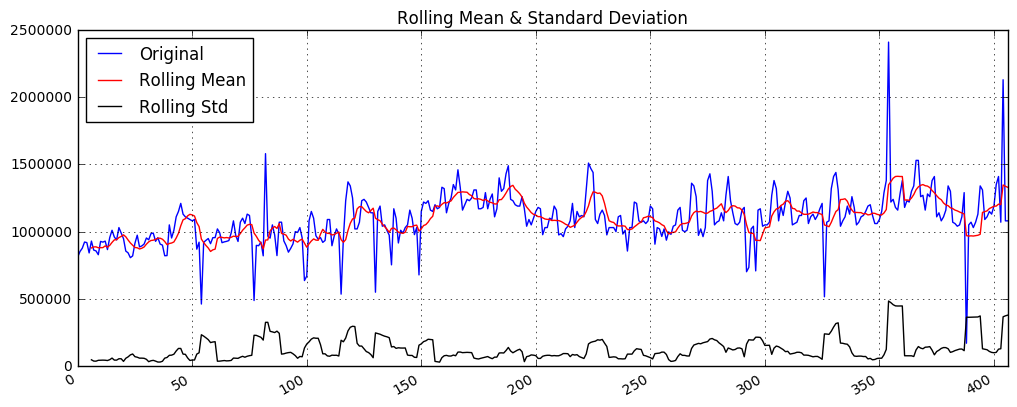

Results of Dickey-Fuller Test:
Test Statistic                  -3.559940
p-value                          0.006575
#Lags Used                       6.000000
Number of Observations Used    400.000000
Critical Value (5%)             -2.868793
Critical Value (1%)             -3.446804
Critical Value (10%)            -2.570634
dtype: float64


In [18]:
test_stationarity(data.data_hsdpa)

In [145]:
#test_stationarity(numpy.log(data.downlink_traffic_volume))

# FFT para detectar sazonalidade

In [32]:
import scipy
n_fft = 256
fs = 200
freqsig = scipy.fft(data.downlink_traffic_volume.values,n=n_fft)
freqaxis = np.arrange(0,fs,fs/n_fftp)

AttributeError: 'DataFrame' object has no attribute 'downlink_traffic_volume'

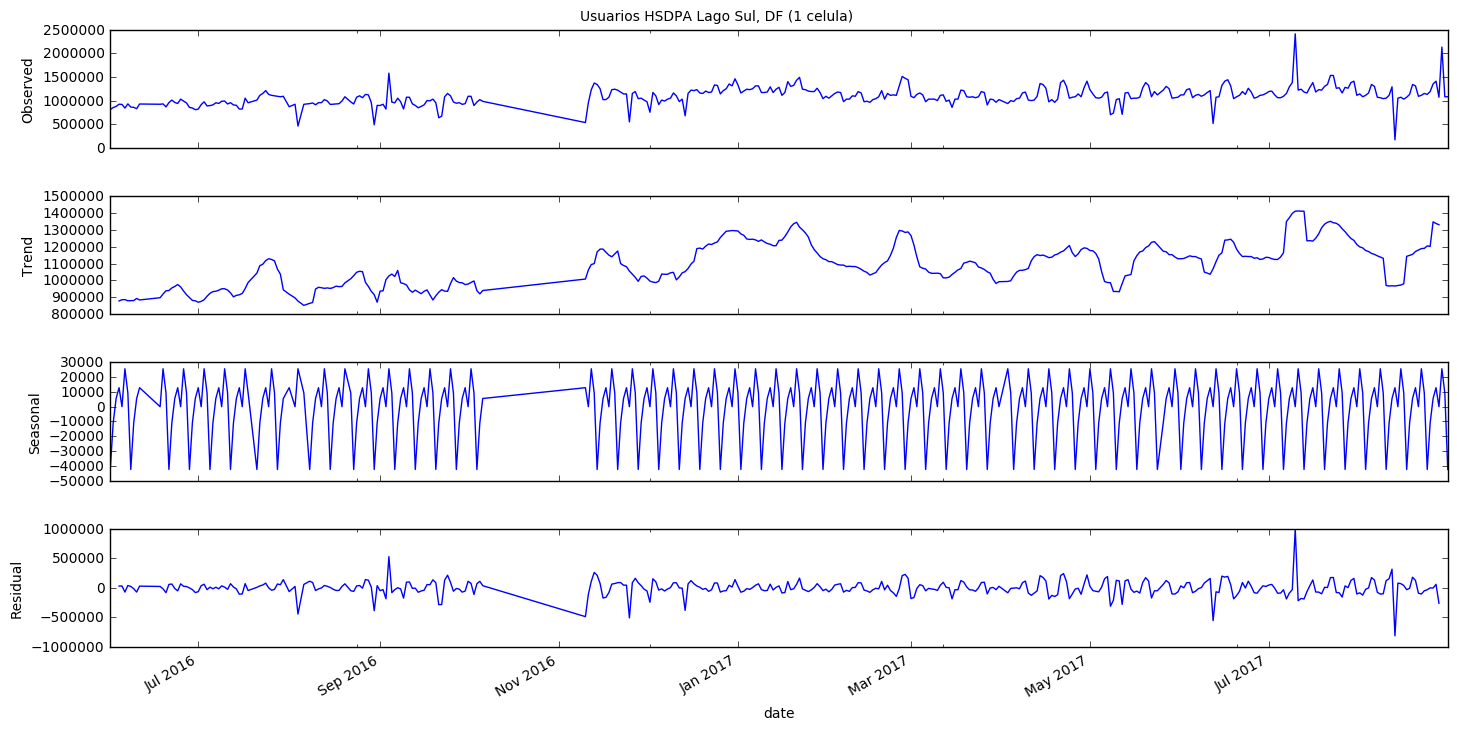

In [19]:
decomposition = sm.tsa.seasonal_decompose(data.data_hsdpa,freq=7)


fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
fig.suptitle('Usuarios HSDPA Lago Sul, DF (1 celula)')

In [55]:
#decomposition = sm.tsa.seasonal_decompose(data.cell_downlink_avg_thp,freq=24*30)


#fig = plt.figure()  
#fig = decomposition.plot()  
#fig.set_size_inches(15, 8)
#fig.suptitle('Usuarios HSDPA Lago Sul, DF (1 celula)')

In [20]:
#plt.plot(decomposition.trend)
residuals = decomposition.resid
residual = residuals.dropna(axis=0, how='any')
print(residual)

date
2016-06-04     30967.119634
2016-06-05     32214.397959
2016-06-06    -70909.861915
2016-06-07     40342.113023
2016-06-08     24540.997734
2016-06-09    -13641.686476
2016-06-10    -70926.365674
2016-06-11     29669.262491
2016-06-18     24011.826531
2016-06-19    -16158.576200
2016-06-20    -81696.029834
2016-06-21     58192.140592
2016-06-22     65407.456381
2016-06-23    -10178.365674
2016-06-24    -50486.166080
2016-06-25     68507.826531
2016-06-26     26297.852371
2016-06-27     23031.541594
2016-06-28      -976.573694
2016-06-29    -28833.400762
2016-06-30    -79067.937103
2016-07-01    -64404.166080
2016-07-02     37203.112245
2016-07-03     62033.423800
2016-07-04    -29790.172692
2016-07-05     12358.283449
2016-07-06    -15491.972190
2016-07-07     10902.634326
2016-07-08    -15860.023223
2016-07-09     34255.826531
                  ...      
2017-07-30    159991.833920
2017-07-31   -102870.887755
2017-08-01    -84249.861915
2017-08-02   -122194.601263
2017-08-03    -

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()


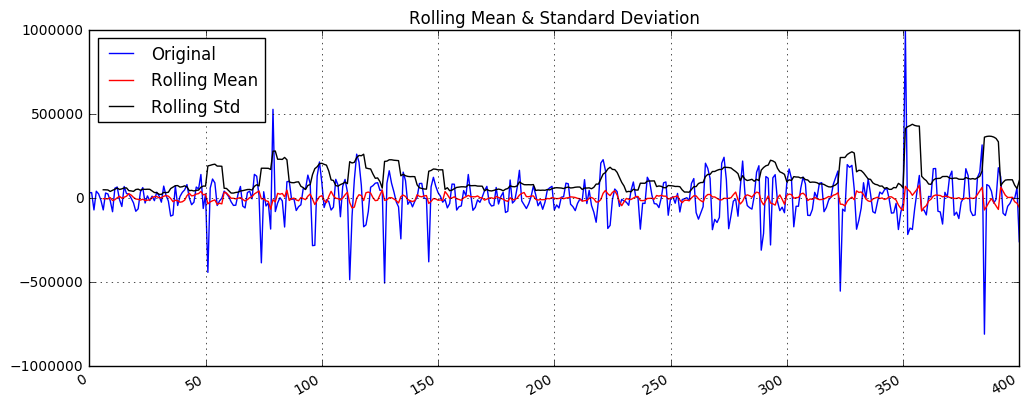

Results of Dickey-Fuller Test:
Test Statistic                -8.802571e+00
p-value                        2.092975e-14
#Lags Used                     1.600000e+01
Number of Observations Used    3.840000e+02
Critical Value (5%)           -2.869096e+00
Critical Value (1%)           -3.447495e+00
Critical Value (10%)          -2.570795e+00
dtype: float64


In [21]:
test_stationarity(residual)

In [22]:
#preprocessing.scale(X_train)

# MLP

In [23]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
residual.as_matrix(columns=None)

array([  3.09671196e+04,   3.22143980e+04,  -7.09098619e+04,
         4.03421130e+04,   2.45409977e+04,  -1.36416865e+04,
        -7.09263657e+04,   2.96692625e+04,   2.40118265e+04,
        -1.61585762e+04,  -8.16960298e+04,   5.81921406e+04,
         6.54074564e+04,  -1.01783657e+04,  -5.04861661e+04,
         6.85078265e+04,   2.62978524e+04,   2.30315416e+04,
        -9.76573694e+02,  -2.88334008e+04,  -7.90679371e+04,
        -6.44041661e+04,   3.72031122e+04,   6.20334238e+04,
        -2.97901727e+04,   1.23582834e+04,  -1.54919722e+04,
         1.09026343e+04,  -1.58600232e+04,   3.42558265e+04,
         1.26231381e+04,  -2.47397441e+04,   7.09675692e+04,
         1.52784564e+04,  -1.76802228e+04,  -1.07482595e+05,
        -1.01640888e+05,   7.23199952e+04,  -4.45360298e+04,
         9.02985488e+03,   3.34864564e+04,   4.83540629e+04,
         7.99918339e+04,   1.41482653e+03,  -3.99641476e+04,
        -2.50517441e+04,   6.54022834e+04,   5.37431707e+04,
         1.39881777e+05,

In [25]:
dataset = residual.values
dataset.shape
y = numpy.expand_dims(dataset, axis=1)  
y.shape

(401L, 1L)

In [26]:
dataset = residual.values
dataset = dataset.astype('float32')
dataset = numpy.expand_dims(dataset, axis=1) 
# split into train and test sets
train_size = int(len(dataset) * 0.674682)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(270, 131)


(270, 131)
Epoch 1/500
0s - loss: 0.0166 - mean_squared_error: 0.0166 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 269.0047
Epoch 2/500
0s - loss: 0.0130 - mean_squared_error: 0.0130 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 278.8641
Epoch 3/500
0s - loss: 0.0127 - mean_squared_error: 0.0127 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 263.9594
Epoch 4/500
0s - loss: 0.0126 - mean_squared_error: 0.0126 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 260.1128
Epoch 5/500
0s - loss: 0.0123 - mean_squared_error: 0.0123 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 240.3363
Epoch 6/500
0s - loss: 0.0120 - mean_squared_error: 0.0120 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 288.5030
Epoch 7/500
0s - loss: 0.0121 - mean_squared_error: 0.0121 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 243.1923
Epoch 8/500
0s - loss: 0.0119 - mean_squared_error: 0.0119 - mean

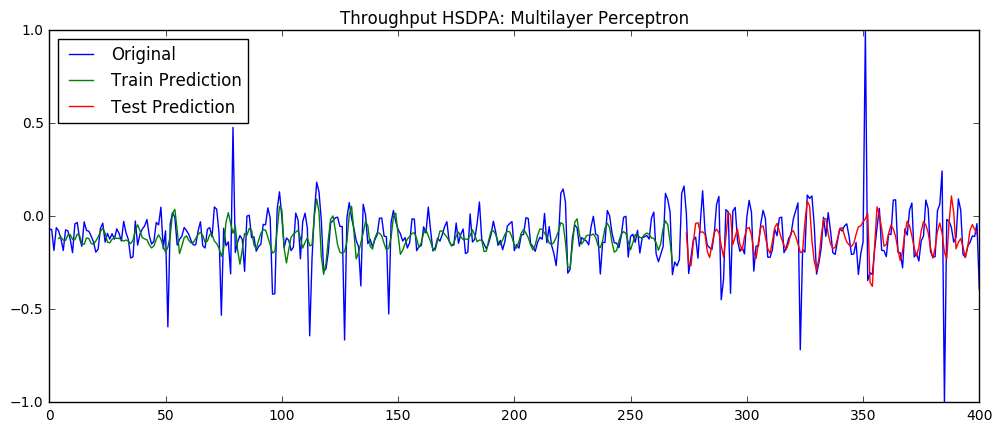

In [29]:
dataset = residual.values
dataset = dataset.astype('float32')
dataset = numpy.expand_dims(dataset, axis=1)  

scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.674682)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

start_time = time.time()

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(4, input_dim=look_back, activation='tanh'))

#model.add(Dense(3, init='uniform', activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='SGD',metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])
model.fit(trainX, trainY, nb_epoch=500, batch_size=2, verbose=2)
# Estimate model performance

#trainScore = model.evaluate(trainX, trainY, verbose=0)
#print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
#print(testX)
#print("HAHAHA")
#print(testY)
testScore = model.evaluate(testX, testY, verbose=0)
print(testScore)
#print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
##trainPredict = scaler.inverse_transform(trainPredict)
##trainY = scaler.inverse_transform([trainY])
##testPredict = scaler.inverse_transform(testPredict)
##testY = scaler.inverse_transform([testY])
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

####time taken
timestamp = (time.time() - start_time)
print("time: "+str(timestamp))
# plot baseline and predictions
plt.plot(dataset,label='Original')
plt.plot(trainPredictPlot,label='Train Prediction')
plt.plot(testPredictPlot,label = 'Test Prediction')
plt.legend(loc='best')
plt.title('Throughput HSDPA: Multilayer Perceptron')
plt.show()

# Função de Auto-correlação

In [107]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [119]:
lag_acf = acf(residual, nlags=24,fft =True)
lag_pacf = pacf(residual, nlags=24, alpha=.05,method='ols')

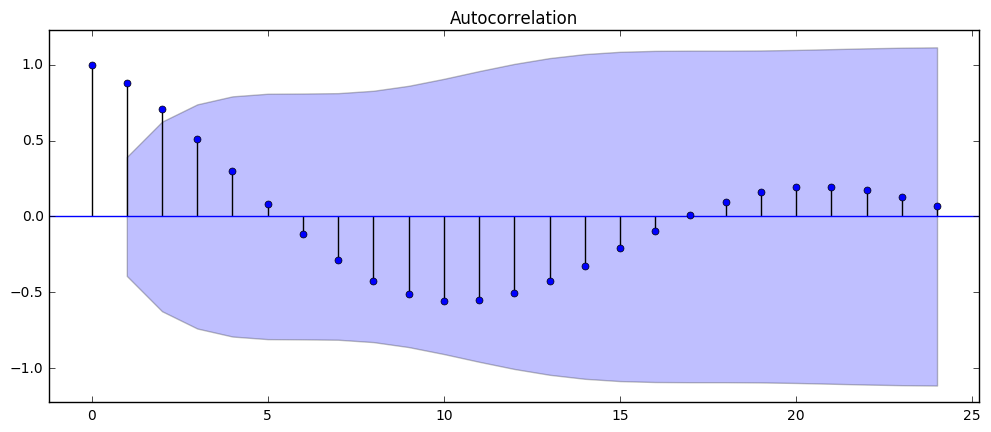

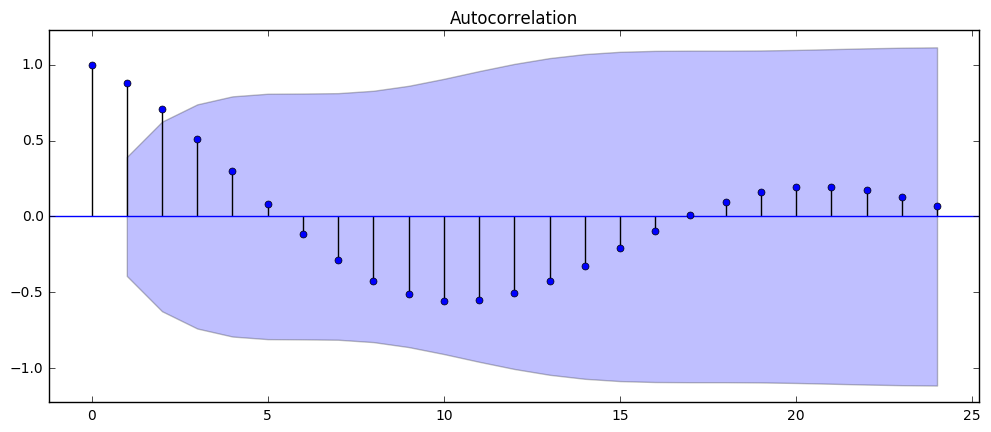

In [121]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(lag_acf,fft=True)
#label('Autocorrelation Function')

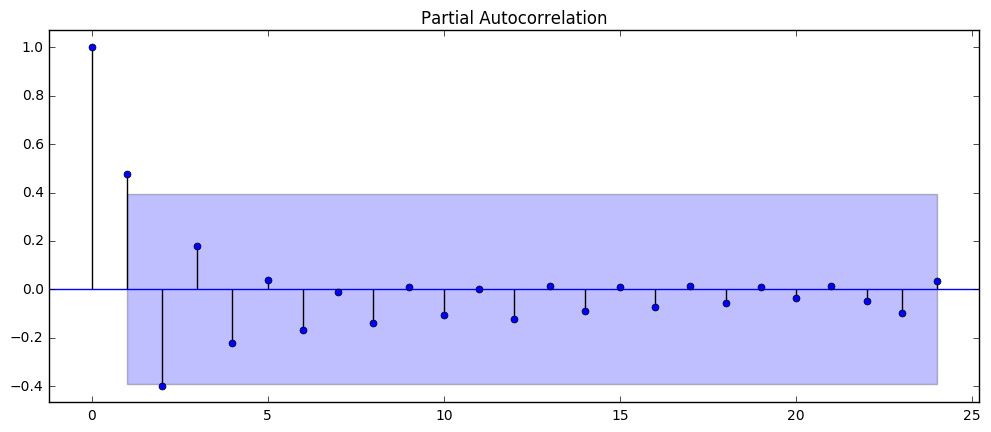

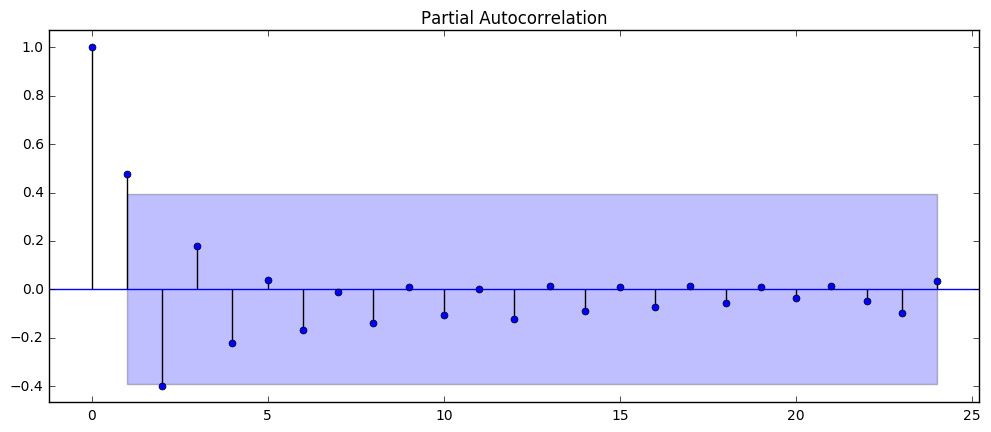

In [112]:
tsaplots.plot_pacf(lag_pacf)
#label('Partial Autocorrelation Function')

# ARIMA 

In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.674682)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [137]:
from statsmodels.tsa.arima_model import ARIMA


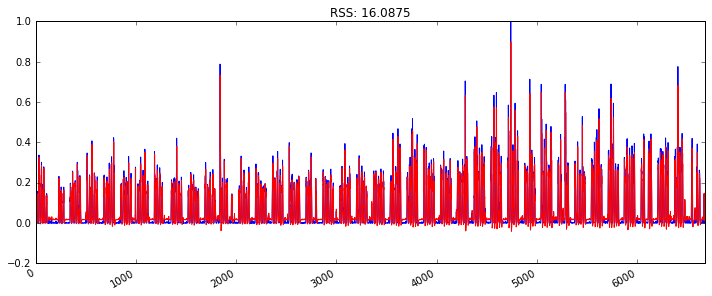

In [138]:
model = ARIMA(ds_log, order=(4, 0, 1))
results_ARIMA = model.fit(disp=-1)  
ds_log_diff.plot(use_index=False)
results_ARIMA.fittedvalues.plot(color='red',use_index=False)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ds_log_diff)**2))
#results_ARIMA.plot_predict(468, 600, dynamic=True, plot_insample=False).plot

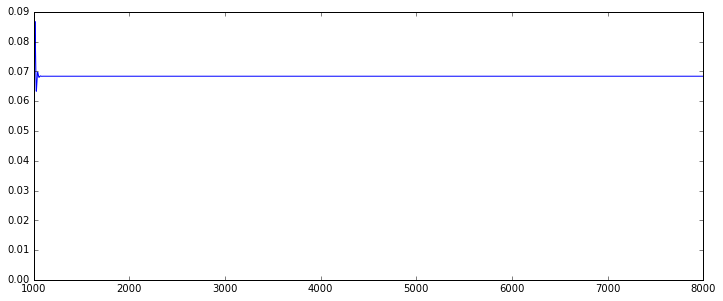

In [143]:
#results_ARIMA.predict(start='2016-09-22 00:00:00', end='2016-09-22 23:00:00', exog=None, dynamic=False).plot()
results_ARIMA.predict(start=1000, end=8000, exog=None, dynamic=True).plot()
#forecast = results_ARIMA.forecast(steps=300, exog=None, alpha=0.05)[0].tolist()
#results_ARIMA.forecast(steps=48, exog=None, alpha=0.05)[0].tolist()
#plt.plot(forecast)

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2016-09-12 00:30:00    0.000360
2016-09-12 01:00:00   -0.019058
2016-09-12 01:30:00   -0.014906
2016-09-12 02:00:00   -0.014536
2016-09-12 02:30:00   -0.024206
dtype: float64


In [153]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

date
2016-09-12 00:30:00    0.001045
2016-09-12 01:00:00   -0.018820
2016-09-12 01:30:00   -0.014230
2016-09-12 02:00:00   -0.013852
2016-09-12 02:30:00   -0.021658
dtype: float64


In [175]:
predictions_ARIMA_log = pd.Series(ds_log.ix[0], index=ds_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2016-09-12 00:00:00    0.307941
2016-09-12 00:30:00    0.307941
2016-09-12 01:00:00    0.307941
2016-09-12 01:30:00    0.307941
2016-09-12 02:00:00    0.307941
dtype: float64

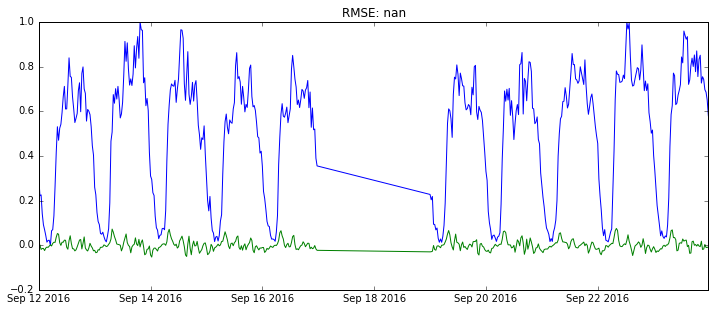

In [41]:
#predictions_ARIMA = predictions_ARIMA_log#np.exp(predictions_ARIMA_log)
predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [179]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/test_lago_sul_20160907_20160930.csv',sep=';', parse_dates=['date'],index_col='date',date_parser=dateparse)
print data.head()
print '\n Data Types:'
print data.dtypes

                                     node  data_hsdpa  hsdpa_users  thp_hsdpa  \
date                                                                            
2016-09-26 00:00:00  DF-BRASILIA-LAGO_SUL        5.54       166.07    1231.98   
2016-09-26 00:30:00  DF-BRASILIA-LAGO_SUL        5.70       146.20    1203.61   
2016-09-26 01:00:00  DF-BRASILIA-LAGO_SUL        4.63       115.87    1040.41   
2016-09-26 01:30:00  DF-BRASILIA-LAGO_SUL        3.72        97.22     888.19   
2016-09-26 02:00:00  DF-BRASILIA-LAGO_SUL        3.24        77.47    1053.04   

                     data_hsdpa_norm  
date                                  
2016-09-26 00:00:00        -0.153330  
2016-09-26 00:30:00        -0.143001  
2016-09-26 01:00:00        -0.212077  
2016-09-26 01:30:00        -0.270825  
2016-09-26 02:00:00        -0.301813  

 Data Types:
node                object
data_hsdpa         float64
hsdpa_users        float64
thp_hsdpa          float64
data_hsdpa_norm    float64
dtype: obj

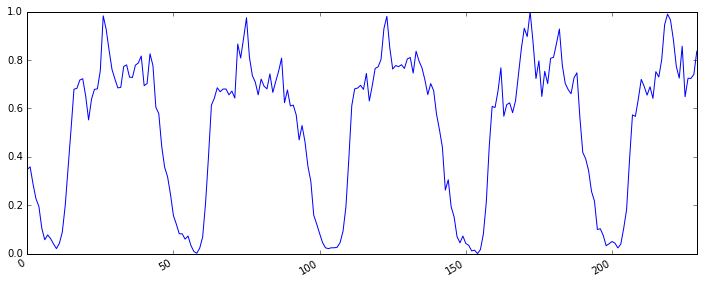

In [181]:
ts = data['data_hsdpa']
ts = (ts - ts.min()) / (ts.max() - ts.min())
ts.plot(use_index=False)

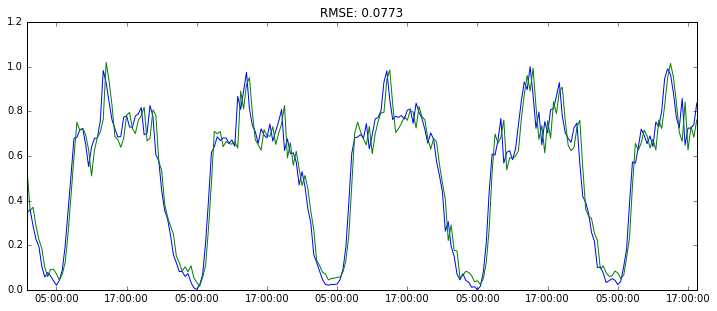

In [183]:
model = ARIMA(ts, order=(1, 0, 5))  
results_ARIMA = model.fit(disp=-1)  

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))